In [3]:
import os
import re

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import utils


In [4]:
data_set = tf.keras.utils.get_file(fname = "imdb.tar.gz", origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", extract = True)

In [22]:
# 그냥 판다스로는 불러오기 X
# 함수 두개가 필요함 하나는 내용 가져오기, 하나는 각 리뷰의 라벨값 가져오기.
# 첫번재 함수 내용가져오기

def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r",encoding = "utf-8") as file:
            data["review"].append(file.read())
    return pd.DataFrame.from_dict(data)
            
    

In [23]:
# pos 폴더는 긍정 = 1, neg폴더는 부정 = 0

def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    
    return pd.concat([pos_df, neg_df])


In [24]:
# 앞에서 설명한 두 함수를 호출해서 판다스 데이터프레임을 반환받는 구문 만들기.

train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [26]:
print(train_df.head())

                                              review  sentiment
0  Bromwell High is a cartoon comedy. It ran at t...          1
1  Homelessness (or Houselessness as George Carli...          1
2  Brilliant over-acting by Lesley Ann Warren. Be...          1
3  This is easily the most underrated film inn th...          1
4  This is not the typical Mel Brooks film. It wa...          1


In [27]:
print(train_df.tail())

                                                  review  sentiment
12495  Towards the end of the movie, I felt it was to...          0
12496  This is the kind of movie that my enemies cont...          0
12497  I saw 'Descent' last night at the Stockholm Fi...          0
12498  Some films that you pick up for a pound turn o...          0
12499  This is one of the dumbest films, I've ever se...          0


In [29]:
print(train_df.shape)
print(test_df.shape)

(25000, 2)
(25000, 2)


In [34]:
# 판다스의 데이터프레임으로부터 리뷰 문장 리스트를 가져오는 함수

review = list(train_df['review'])
print(review[:1])
print(type(review))

['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!']
<class 'list'>


In [55]:
# review는 각 문장을 리스트로 담고있음. 
# 단어들을 토크나이징하고 문장마다 토크나이징 된 단어의 수를 저장하고 그 단어들을 붙여 알파벳의 전체 개수를 저장하는 부분.

# 문자열 문장 리스트를 토크나이징
tokenized_reviews = [r.split() for r in review]
print(tokenized_reviews)

## 리스트 컴프리핸션 풀어 놓은거
# tokenized_reviews = []
# for r in review:
#     tokenized_reviews.append(r.split())
# print(tokenized_reviews)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
# 토크나이징된 리스트에 대한 각 길이를 저장.

'''review_len_by_token = []
for t in tokenized_reviews:
    review_len_by_token.append(len(t))

print(review_len_by_token)'''

review_len_by_token = [len(t) for t in tokenized_reviews]
print(review_len_by_token)



[140, 428, 147, 124, 120, 171, 108, 340, 436, 324, 280, 86, 282, 224, 145, 158, 195, 279, 129, 152, 214, 556, 168, 179, 141, 104, 109, 310, 150, 142, 244, 119, 159, 165, 437, 453, 54, 298, 221, 331, 356, 160, 527, 242, 112, 331, 966, 544, 87, 1839, 436, 541, 182, 539, 202, 715, 180, 162, 54, 278, 93, 181, 133, 216, 316, 165, 103, 223, 106, 96, 124, 194, 291, 322, 44, 148, 107, 326, 71, 224, 115, 262, 111, 117, 55, 56, 268, 129, 169, 159, 249, 76, 196, 119, 164, 55, 63, 101, 137, 166, 168, 216, 114, 160, 588, 159, 272, 242, 146, 507, 225, 337, 193, 54, 163, 116, 274, 395, 272, 354, 187, 104, 222, 197, 140, 221, 512, 159, 112, 110, 157, 142, 221, 145, 323, 171, 143, 211, 629, 237, 319, 199, 341, 135, 303, 103, 130, 160, 121, 649, 141, 172, 414, 299, 498, 329, 392, 153, 153, 185, 185, 133, 136, 295, 499, 90, 391, 333, 154, 149, 95, 148, 145, 173, 74, 110, 124, 133, 114, 390, 145, 123, 137, 147, 157, 220, 129, 133, 132, 147, 200, 135, 457, 273, 161, 421, 401, 161, 155, 150, 267, 183, 134, 

In [56]:
# 토크나이징된 것을 붙여서 음정의 길이를 저장

review_len_by_eumjeol = [len(s.replace(' ','')) for s in review]
print(review_len_by_eumjeol)

# review_len_by_eumjeol = []
# for s in review:
#     review_len_by_eumjeol.append(len(s.replace(' ','')))

c:\users\bitcamp\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'Number of Reviews')

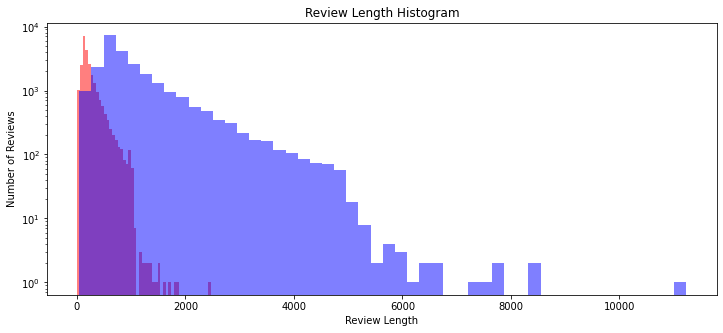

In [60]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 크기 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize = (12, 5))

# 히스토그램 선언
# bins = 히스토그램 값에 대한 버킷 범위
# alphas = 그래프 색상 투명도
# color = 그래프 색상
# label = 그래프에 대한 라벨

plt.hist(review_len_by_token, bins = 50, alpha = 0.5, color = 'r', label = 'word')
plt.hist(review_len_by_eumjeol, bins = 50, alpha = 0.5, color = 'b', label = 'alphabet')
plt.yscale('log', nonposy = 'clip')

# 그래프 제목
plt.title('Review Length Histogram')

# 그래프 x 축 라벨
plt.xlabel("Review Length")
# 그래프 y 축 라벨
plt.ylabel("Number of Reviews")



In [62]:

print('문장 길이 길이: {}'.format(np.max(review_len_by_token)))
print('문장 길이 길이: {}'.format(np.min(review_len_by_token)))
print('문장 길이 길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 길이 중간 길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음

# 1 / 4 지점
print('제 1 사분위: {}'.format(np.percentile(review_len_by_token, 25)))\

# 3 / 4 지점 
print('제 3 사분위: {}'.format(np.percentile(review_len_by_token, 75)))

문장 길이 길이: 2470
문장 길이 길이: 10
문장 길이 길이: 233.79
문장 길이 표준편차: 173.73
문장 길이 중간 길이: 174.0
제 1 사분위: 127.0
제 3 사분위: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1f2d79ba668>,
 'caps': [<matplotlib.lines.Line2D at 0x1f2d79bac18>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f2d79ba5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f2d7a11208>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f2d7a116d8>],
 'means': [<matplotlib.lines.Line2D at 0x1f2d7a114e0>]}

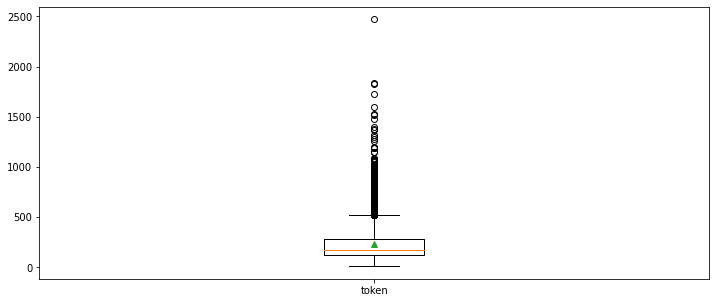

In [63]:
plt.figure(figsize = (12, 5))

# 박스 플롯 생성
# 첫 번째 인자: 여러 분포에 대한 데이터 리스트를 입력
# labers: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token], labels = ['token'], showmeans = True)